In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [2]:
df = pd.read_csv('titanic_data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data exploration

In [3]:
df.shape

(891, 12)

In [4]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

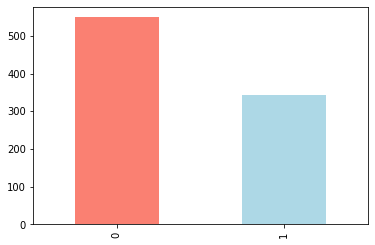

In [5]:
# Check how many people survived 
df['Survived'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# Replace female with 1 and male with 0
df['Sex'] = np.where(df['Sex'] == 'female', 1, 0)

In [9]:
# Make new columns Female, Male and drop colmn Sex
# df['Female'] = (df['Sex'] == 1).astype(int)
# df['Male'] = (df['Sex'] == 0).astype(int)

# df.drop('Sex', axis=1, inplace=True)

In [8]:
# Drop Name, Ticket column
df.drop('Name', axis=1, inplace=True)

df.drop('Ticket', axis=1, inplace=True)

df.drop('Cabin', axis=1, inplace=True)

In [11]:
# Group different Fare's into 5 bins
# df['Fare'] = pd.cut(df['Fare'], bins=5)

In [12]:
df.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [9]:
# Convert Age column to numeric
df['Age'].fillna(df['Age'].mean(), inplace=True)

# df.drop('Age', axis=1, inplace=True)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [11]:
# Convert objects to category
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype('category')

In [12]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex               int32
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
dtype: object

### Find missing values

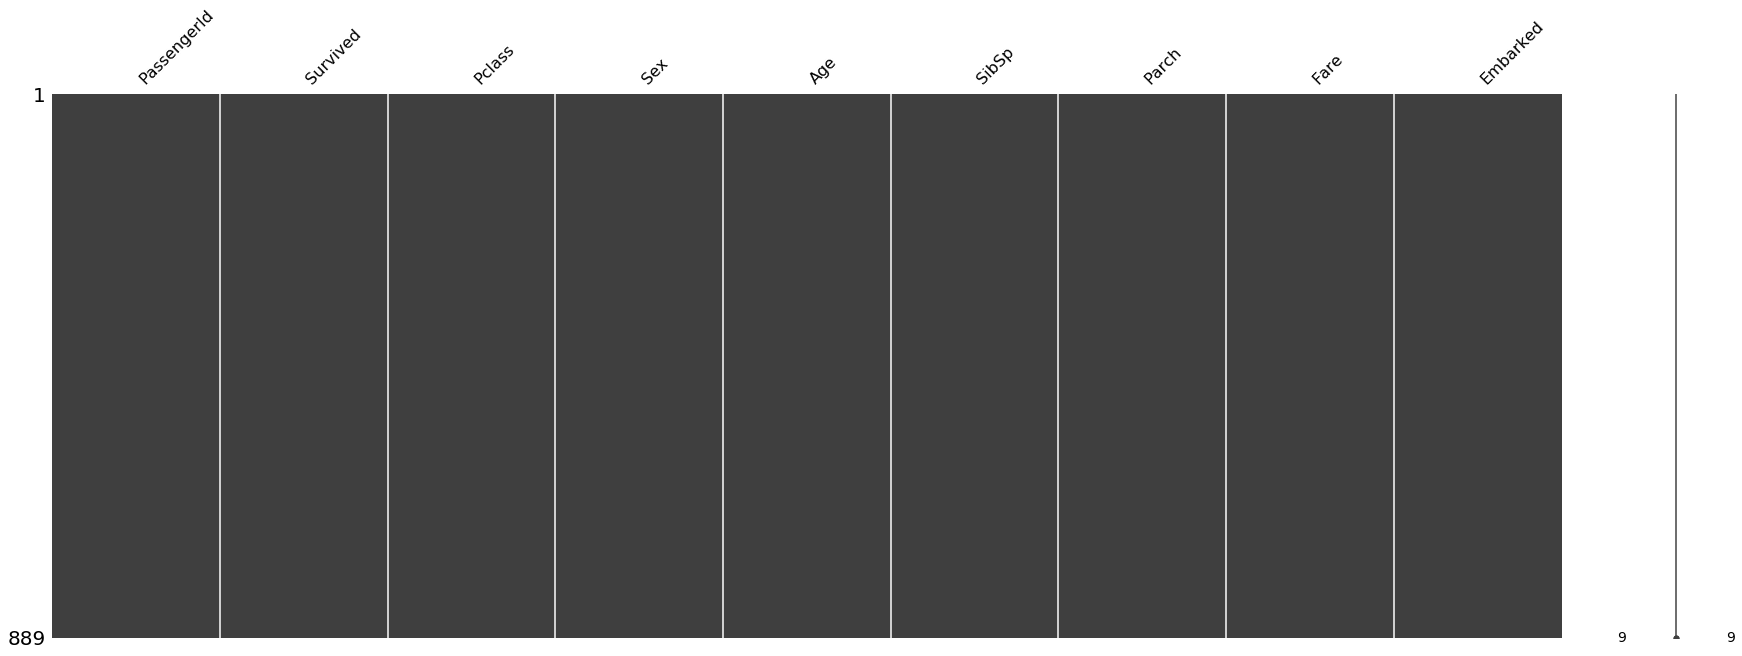

In [16]:
missingno.matrix(df, figsize=(30,10));

In [14]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [15]:
# Fill age null values with the median
# df['Age'].fillna(df['Age'].mean(), inplace=True)
df = df.dropna(subset=['Embarked'])

In [1]:
# Turn categorical variables into numbers and fill them
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1 (null values have code of -1)
        df[label] = pd.Categorical(content).codes+1

NameError: name 'df' is not defined

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int32  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int8   
dtypes: float64(2), int32(1), int64(5), int8(1)
memory usage: 59.9 KB


In [19]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [20]:
df.Sex.value_counts()

0    577
1    312
Name: Sex, dtype: int64

In [21]:
# Compare target column with sex column
pd.crosstab(df.Survived, df.Sex)

Sex,0,1
Survived,,
0,468,81
1,109,231


In [22]:
# Compare target column with pclass
pd.crosstab(df.Survived, df.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,134,87,119


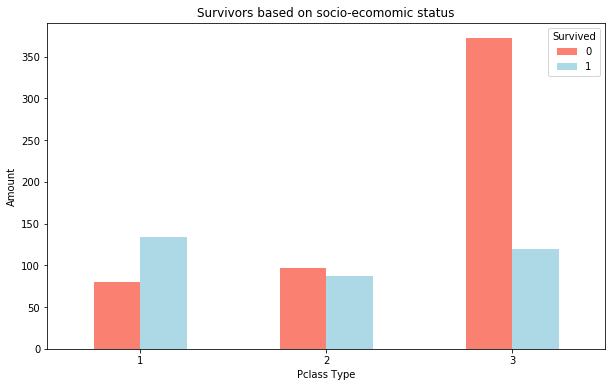

In [23]:
pd.crosstab(df.Pclass, df.Survived).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue'])

plt.title('Survivors based on socio-ecomomic status')
plt.xlabel('Pclass Type')
plt.ylabel('Amount')
plt.xticks(rotation=0);

In [24]:
df.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [25]:
# Make a corellation matrix
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,-0.043136,0.030300,-0.057686,-0.001657,0.012703,0.013166
Survived,-0.005028,1.000000,-0.335549,0.541585,-0.074673,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.035330,-0.335549,1.000000,-0.127741,-0.327954,0.081656,0.016824,-0.548193,0.164681
Sex,-0.043136,0.541585,-0.127741,1.000000,-0.089434,0.116348,0.247508,0.179958,-0.110320
Age,0.030300,-0.074673,-0.327954,-0.089434,1.000000,-0.231875,-0.178232,0.088604,-0.028927
SibSp,-0.057686,-0.034040,0.081656,0.116348,-0.231875,1.000000,0.414542,0.160887,0.068900
Parch,-0.001657,0.083151,0.016824,0.247508,-0.178232,0.414542,1.000000,0.217532,0.040449
Fare,0.012703,0.255290,-0.548193,0.179958,0.088604,0.160887,0.217532,1.000000,-0.226311
Embarked,0.013166,-0.169718,0.164681,-0.110320,-0.028927,0.068900,0.040449,-0.226311,1.000000


## Modelling

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

In [27]:
# Split into X and y

X = df.drop('Survived', axis=1)
y = df['Survived']

In [28]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(42)

    #Make a dictionary to keep models scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its cross validated score to model_scores
        cv_acc = cross_val_score(model, X, y, cv=5, scoring=None)
        model_scores[name] = np.mean(cv_acc)
        
    return model_scores

In [30]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'Logistic Regression': 0.8042912461118517,
 'KNN': 0.5423411413698979,
 'Random Forest': 0.8020567510950295}

## Random Forest hyperparameter tuning

In [31]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [32]:
# Tune RandomForestClassifier

np.random.seed(42)

# Setup random hyperparameter search for RandomForest
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameters search model for LogisticRegression
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [33]:
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [34]:
rs_rf.score(X_test, y_test)

0.797752808988764

In [35]:
# Create a hyperparameter grid for LigisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}
# Τune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameters search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [37]:
rs_log_reg.score(X_test, y_test)

0.7921348314606742

## Make predictions on test data

In [46]:
df_test = pd.read_csv('titanic_data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
def preprocess_data(df):
    
    df['Sex'] = np.where(df['Sex'] == 'female', 1, 0)
    
    # Convert Sex and Age column to integer
    df['Age'] = pd.to_numeric(df['Age'])
    
    # Drop Name column
    df.drop('Name', axis=1, inplace=True)
    df.drop('Ticket', axis=1, inplace=True)
    df.drop('Cabin', axis=1, inplace=True)
    
    # Convert objects to category
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype('category')
        if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1 (null values have code of -1)
            df[label] = pd.Categorical(content)
            
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Fare'].fillna(df['Fare'].mean(), inplace=True)
    
    return df;

In [48]:
df_test = preprocess_data(df_test)

In [49]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [53]:
# Make predictions on test data
test_preds = rs_rf.predict(df_test)

In [54]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds['PassengerId'] = df_test['PassengerId']
df_preds['Survived'] = test_preds
df_preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [55]:
# Export prediction data
df_preds.to_csv('titanic_data/test_predictions.csv', index=False)